# Sommaire:


**Objectifs de la mission**


**I) Préparation de l'environnement et importation des données**
 - <a href="#C1">Initialisation des librairies de base</a>
 - <a href="#C2">Selection des colonnes sur un échantillon du dataframe</a>
 - <a href="#C3">Importation des données totales</a>


**II) Nettoyage des données**
- <a href="#C4">Nettoyage des données numériques</a>
- <a href="#C5">Nettoyage des données textuelles</a>
- <a href="#C6">Nettoyage des doublons</a>


**III) Analyse des valeurs manquantes**


**IV) Prédiction des valeurs manquantes par des valeurs connus**

**V) Prédiction des valeurs manquantes par machine learning**
- <a href="#C7">Préparation du jeu de donnée</a>
- <a href="#C8">Selection du meilleur modèle </a>
- <a href="#C9">Optimisation et entraînement du modèle</a>
- <a href="#C10">Prédiction des valeurs manquantes du jeu de données</a>
- <a href="#C11">Prédiction du Grade Nutriscore</a>


***

# Objectifs de la mission

#### 1) Réfléchir à une idée d’application.

#### 2) Traiter le jeu de données :

- Repérer des variables pertinentes pour les traitements à venir, et nécessaires pour l'idée d’application.
- Nettoyer les données en :
    - mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
    - identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
    - Automatisant ces traitements pour éviter de répéter ces opérations


#### 2) Produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.



#### 3) Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

#### 4) Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

#### 5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.



# **I) Préparation de l'environnement et importation des données**


## <a name="C1"> Initialisation des librairies de base</a>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


## <a name="C2"> Selection des colonnes sur un échantillon du dataframe</a>

In [3]:
#df_lite =  pd.read_csv(r'B:\OpenClassRooms\Data_Scientist\Projet_3\fr.openfoodfacts.org.products.csv',sep='\t',low_memory=False,nrows=10_000)


In [4]:
#col=list(df_lite.columns)
#col

In [5]:
lst_Columns = ['code',
               'product_name',
               'brands',
               'origins_fr',
               'manufacturing_places',
               'labels_fr',
               'additives_n',
               'additives_fr',
               'nutriscore_score',
               'nutriscore_grade',
               'pnns_groups_1',
               'pnns_groups_2',
               'energy_100g',
               'fat_100g',
               'saturated-fat_100g',
               'fiber_100g',
               'proteins_100g',
               'sugars_100g',
               'sodium_100g',
               'fruits-vegetables-nuts-estimate-from-ingredients_100g']

## <a name="C3"> Importation des données totales</a>

In [6]:
chunk = pd.read_csv(r'B:\OpenClassRooms\Data_Scientist\Projet_3\fr.openfoodfacts.org.products.csv',sep='\t',low_memory=False,chunksize=1000000,usecols = lst_Columns)
df = pd.concat(chunk)

In [7]:
print(df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497900 entries, 0 to 2497899
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count    Dtype  
---  ------                                                 --------------    -----  
 0   code                                                   2497900 non-null  object 
 1   product_name                                           2408504 non-null  object 
 2   brands                                                 1215886 non-null  object 
 3   origins_fr                                             102280 non-null   object 
 4   manufacturing_places                                   141142 non-null   object 
 5   labels_fr                                              491489 non-null   object 
 6   additives_n                                            781080 non-null   float64
 7   additives_fr                                           447868 non-null   object 
 8   nutriscore_score      

In [8]:
# Les données brutes contiennent 2 497 900 de lignes 
# L'objectifs est maintenant de nettoyer ce jeu de données des valeurs abhérentes, valeurs dupliquées, valeurs manquantes.
# Les données textuelles et numériques seront traitées séparément.

# II) Nettoyage des données

## <a name="C4"> Nettoyage des données numériques</a>

In [9]:
# Description des données numériques
df.describe()

,additives_n,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
count,781080.000000,805257.000000,1.986133e+06,1.974298e+06,1.931418e+06,1.957899e+06,7.922690e+05,1.976088e+06,1.787112e+06,779983.000000
mean,2.004252,9.069950,3.356049e+36,5.065693e+11,7.260235e+00,5.107518e+07,1.238629e+41,1.323588e+01,1.068928e+00,8.603270
std,2.871540,8.830815,4.729687e+39,7.116946e+14,2.245782e+03,7.146689e+10,1.102498e+44,5.202032e+03,2.225954e+02,35.764529
min,0.000000,-15.000000,-3.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-6.700000e+00,-9.000000e+00,0.000000e+00,0.000000
25%,0.000000,1.000000,4.180000e+02,7.700000e-01,1.000000e-01,5.000000e-01,0.000000e+00,1.300000e+00,3.600000e-02,0.000000
50%,1.000000,10.000000,1.071000e+03,7.000000e+00,1.770000e+00,3.570000e+00,1.600000e+00,6.000000e+00,2.400000e-01,0.000000
75%,3.000000,16.000000,1.674000e+03,2.100000e+01,7.000000e+00,1.700000e+01,3.700000e+00,1.250000e+01,5.600000e-01,0.500000
max,49.000000,40.000000,6.665559e+42,1.000000e+18,3.030330e+06,1.000000e+14,9.813275e+46,7.277272e+06,2.909084e+05,13461.000000


In [10]:
Components_columns = ["sugars_100g","saturated-fat_100g","fat_100g","fiber_100g","proteins_100g","sodium_100g","fruits-vegetables-nuts-estimate-from-ingredients_100g"]

# Les éléments constituants le Nutri-Score ne peuvent comporter que des valeurs entre 0 et 100g. 


for columns in Components_columns:
    df.loc[(df[columns]>100) | (df[columns]< 0)] = np.nan

# Les sources alimentaires les plus riches en energie sont les lipides (fat) avec une valeur de 37(kJ/g). Le maximum attendu de la colonne energie_100g, est donc de 3700kj/100g. On peut ajouter à cela 5% de marge d'erreur

df.loc[(df["energy_100g"]>3700) | (df["energy_100g"]< 0)] = np.nan



In [11]:
df.describe()

,additives_n,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
count,777264.000000,797419.000000,1.966949e+06,1.955289e+06,1.912995e+06,1.939671e+06,786872.000000,1.957267e+06,1.770683e+06,776170.000000
mean,2.007896,9.058138,1.109714e+03,1.318812e+01,4.896269e+00,1.291214e+01,3.272082,8.808273e+00,5.685576e-01,8.235328
std,2.872977,8.842313,7.796206e+02,1.662564e+01,7.482382e+00,1.930408e+01,5.928076,1.024133e+01,2.078233e+00,21.675779
min,0.000000,-15.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,1.000000,4.140000e+02,7.000000e-01,1.000000e-01,6.000000e-01,0.000000,1.355932e+00,4.000000e-02,0.000000
50%,1.000000,10.000000,1.059000e+03,6.800000e+00,1.700000e+00,3.570000e+00,1.600000,6.000000e+00,2.400000e-01,0.000000
75%,3.000000,16.000000,1.657000e+03,2.100000e+01,6.800000e+00,1.700000e+01,3.703704,1.250000e+01,5.600000e-01,0.400000
max,49.000000,40.000000,3.700000e+03,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,100.000000


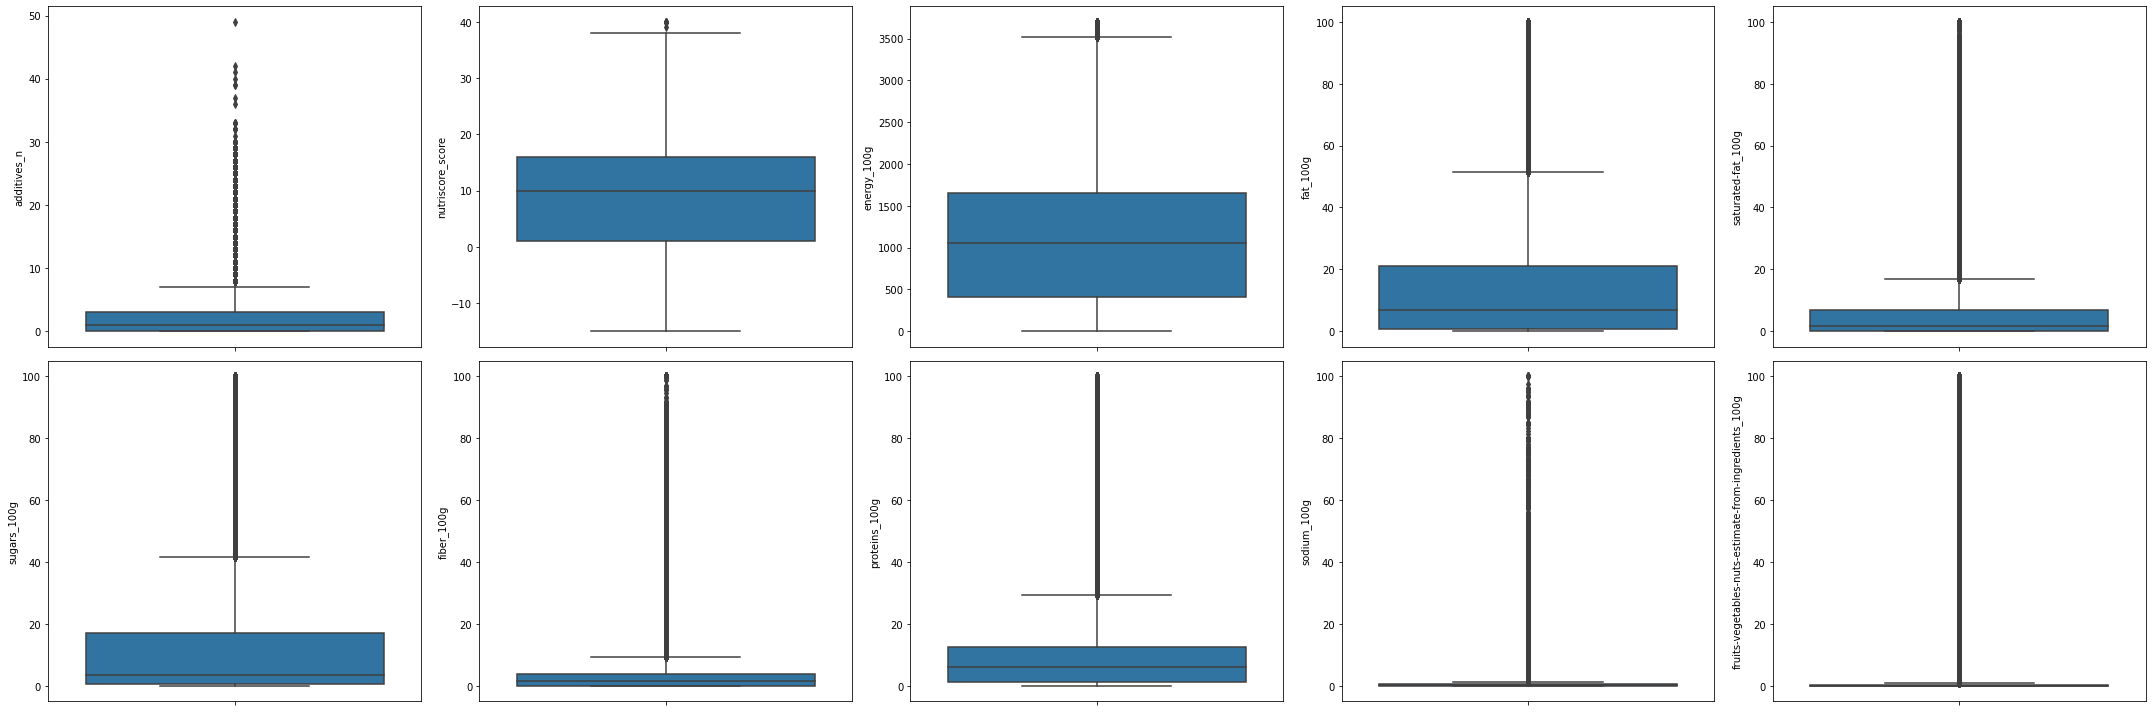

In [12]:
fig, axs = plt.subplots(ncols=5,nrows=2,figsize=(30,10))

sns.boxplot(ax=axs[0,0], y="additives_n", data=df,showfliers = True)
#sns.stripplot(ax=axs[0,0],y = "additives_n",
#              alpha = 0.5,
#              color='black',
#              size=2,
#              data = df)

sns.boxplot(ax=axs[0,1], y="nutriscore_score", data=df,showfliers = True)
#sns.stripplot(ax=axs[0,1],y = "nutriscore_score",
#              alpha = 0.5,
#              color='black',
#              size=2,
#              data = df)


sns.boxplot(ax=axs[0,2], y="energy_100g", data=df,showfliers = True)
#sns.stripplot(ax=axs[0,2],y = "energy_100g",
#              alpha = 0.5,
#              color='black',
#              size=2,
#              data = df)


sns.boxplot(ax=axs[0,3], y="fat_100g", data=df,showfliers = True)
#sns.stripplot(ax=axs[0,3],y = "fat_100g",
#              alpha = 0.5,
#              color='black',
#              size=2,
#              data = df)


sns.boxplot(ax=axs[0,4], y="saturated-fat_100g", data=df,showfliers = True)
#sns.stripplot(ax=axs[0,4],y = "saturated-fat_100g",
#              alpha = 0.5,
#              color='black',
#              size=2,
#              data = df)

sns.boxplot(ax=axs[1,0], y="sugars_100g", data=df,showfliers = True)
#sns.stripplot(ax=axs[1,0],y = "sugars_100g",
#              alpha = 0.5,
#              color='black',
#              size=2,
#              data = df)

sns.boxplot(ax=axs[1,1], y="fiber_100g", data=df,showfliers = True)
#sns.stripplot(ax=axs[1,1],y = "fiber_100g",
#              alpha = 0.5,
#              color='black',
#              size=2,
#              data = df)

sns.boxplot(ax=axs[1,2], y="proteins_100g", data=df,showfliers = True)
#sns.stripplot(ax=axs[1,2],y = "proteins_100g",
#              alpha = 0.5,
#              color='black',
#              size=2,
#              data = df)

sns.boxplot(ax=axs[1,3], y="sodium_100g", data=df,showfliers = True)
#sns.stripplot(ax=axs[1,3],y = "sodium_100g",
#              alpha = 0.5,
#              color='black',
#              size=2,
#              data = df)

sns.boxplot(ax=axs[1,4], y="fruits-vegetables-nuts-estimate-from-ingredients_100g", data=df,showfliers = True)
#sns.stripplot(ax=axs[1,4],y = "fruits-vegetables-nuts-estimate-from-ingredients_100g",
#              alpha = 0.5,
#              color='black',
#              data = df,
 #             size=2)
fig.tight_layout()

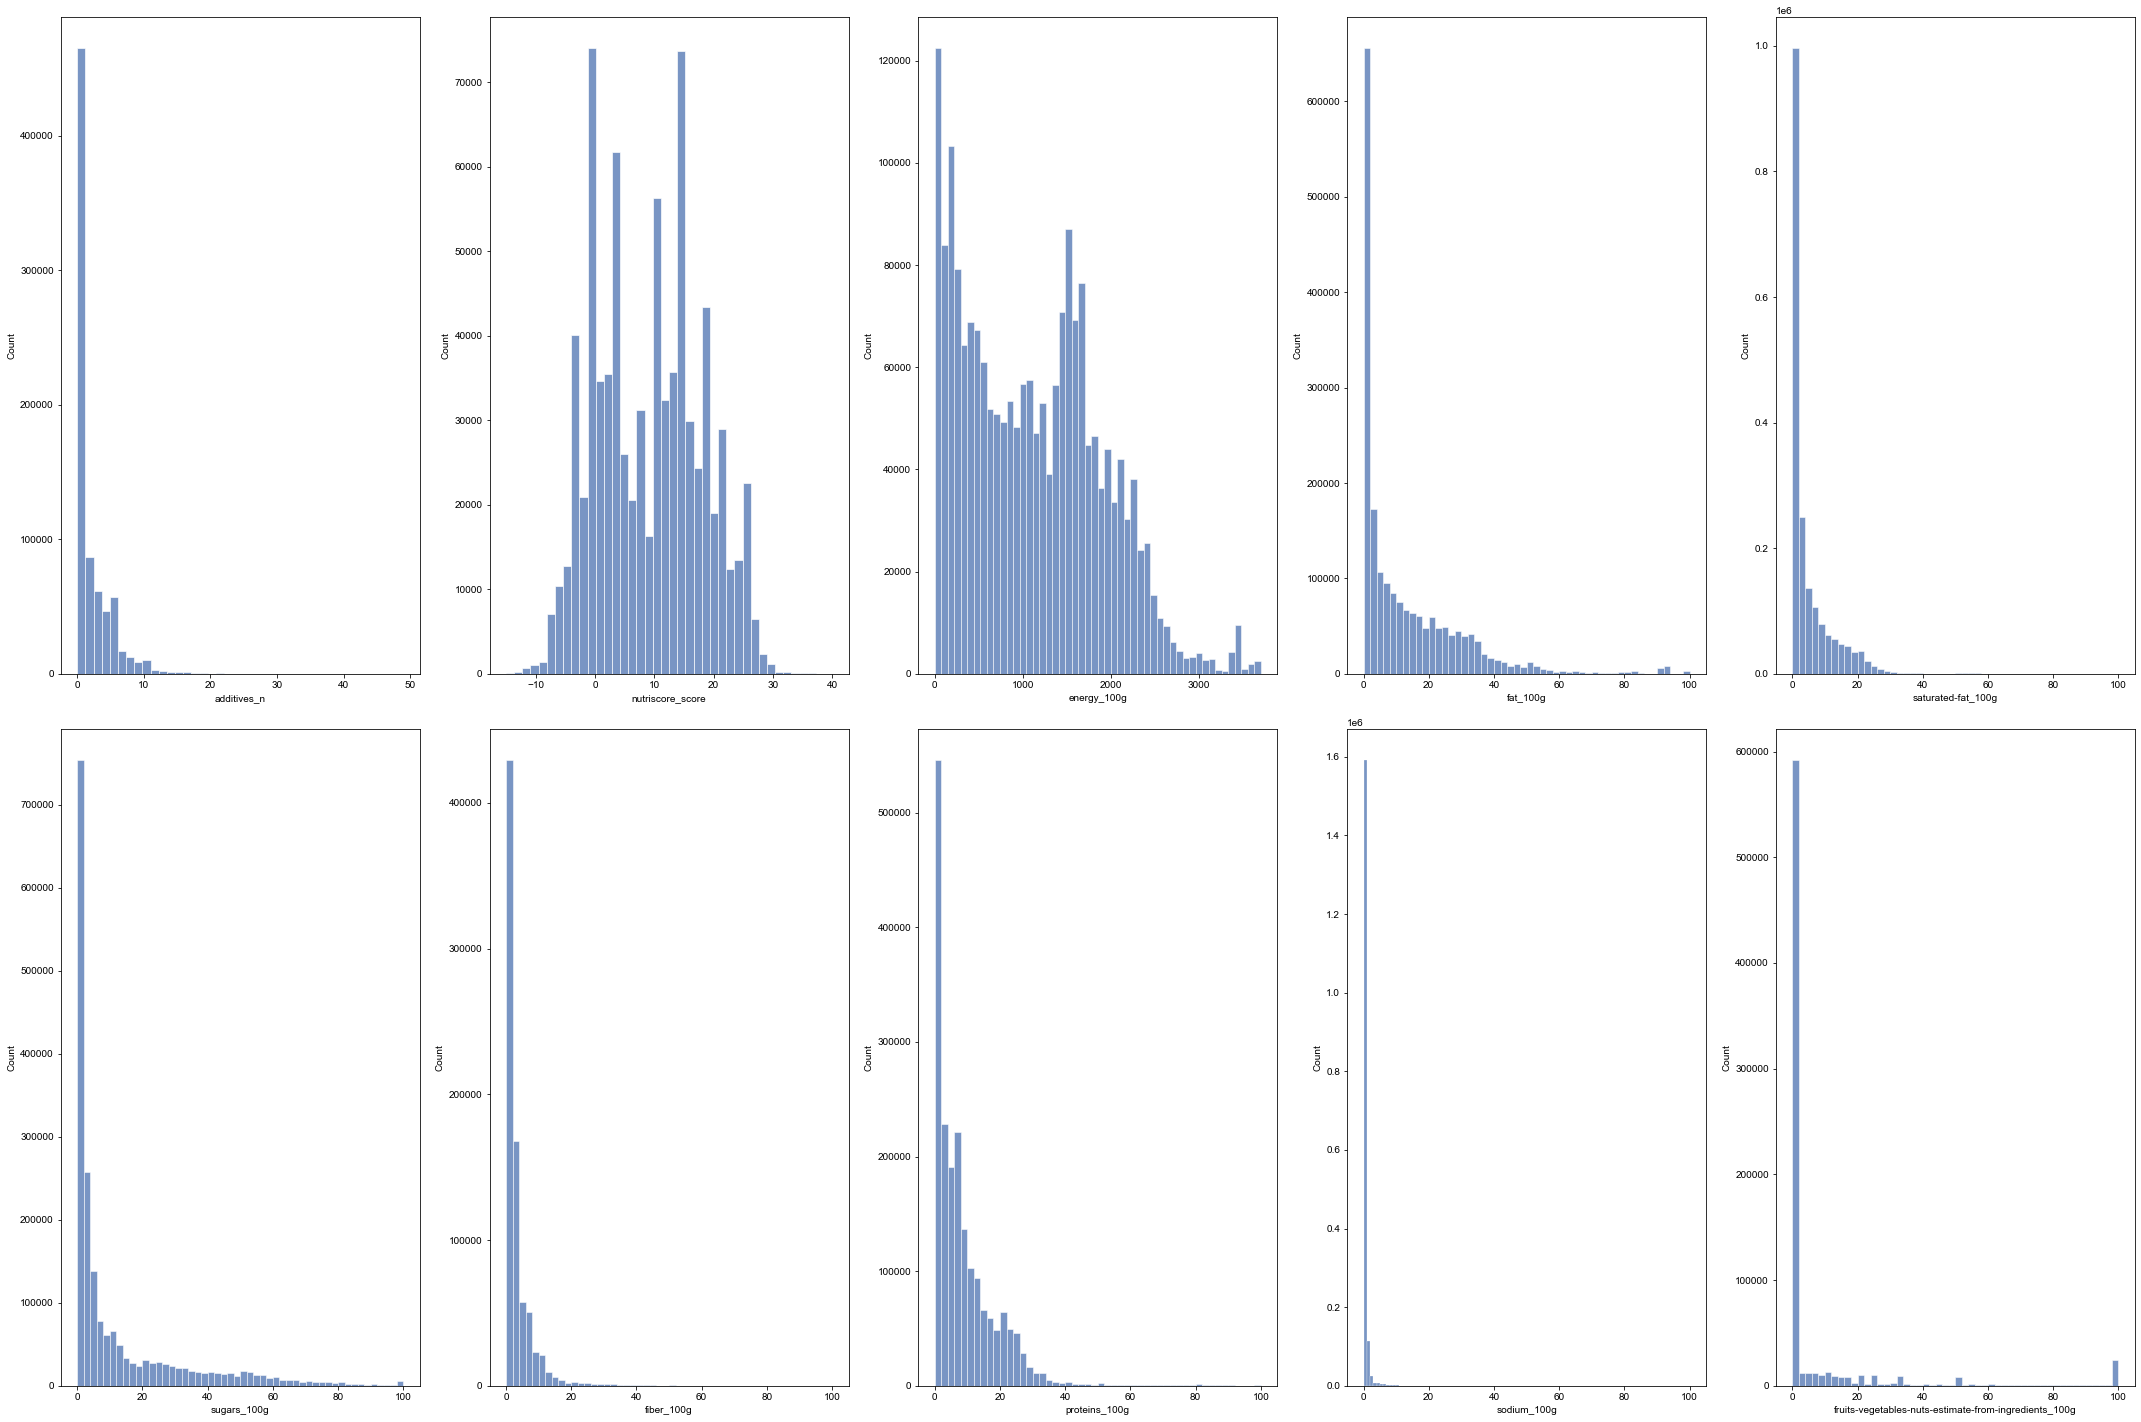

In [13]:

fig, axes = plt.subplots(ncols=5,nrows=2,figsize=(30,20))

sns.set(font_scale=1.25)
sns.histplot(ax=axes[0,0],data=df, x="additives_n",bins=40)
sns.histplot(ax=axes[0,1],data=df, x="nutriscore_score",bins=40)
sns.histplot(ax=axes[0,2],data=df, x="energy_100g",bins=50)
sns.histplot(ax=axes[0,3],data=df, x="fat_100g",bins=50)
sns.histplot(ax=axes[0,4],data=df, x="saturated-fat_100g",bins=50)
sns.histplot(ax=axes[1,0],data=df, x="sugars_100g",bins=50)
sns.histplot(ax=axes[1,1],data=df, x="fiber_100g",bins=50)
sns.histplot(ax=axes[1,2],data=df, x="proteins_100g",bins=50)
sns.histplot(ax=axes[1,3],data=df, x="sodium_100g",bins=100)
sns.histplot(ax=axes[1,4],data=df, x="fruits-vegetables-nuts-estimate-from-ingredients_100g",bins=50)

#axes[3,2].set_visible(False)

fig.tight_layout()

plt.show()

## <a name="C5"> Nettoyage des données textuelles</a>

In [14]:
# Ce qui va nous intéresser particulièrement dans ce jeu de données sont les données de l'origine
# L'étape de traitement : Créer une colonne origine : France ou non
#                            créer une colonne bion : Bio ou non
# Vérifier que les groupes pnns_groups_1, pnns_groups_2 et nutriscore_grade n'ont pas de valeurs abérantes. 


In [15]:
df.columns

Index(['code', 'product_name', 'brands', 'origins_fr', 'manufacturing_places',
       'labels_fr', 'additives_n', 'additives_fr', 'nutriscore_score',
       'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'sodium_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g'],
      dtype='object')

#### PNNS_groups_1

In [16]:
print(df['pnns_groups_1'].sort_values().unique())

['Alcoholic beverages' 'Beverages' 'Cereals and potatoes'
 'Composite foods' 'Fat and sauces' 'Fish Meat Eggs'
 'Fruits and vegetables' 'Milk and dairy products' 'Salty snacks'
 'Sugary snacks' 'sugary-snacks' 'unknown' nan]


In [17]:
df['pnns_groups_1'] = df['pnns_groups_1'].replace('sugary-snacks','Sugary snacks',regex = True)
df['pnns_groups_1'] = df['pnns_groups_1'].replace(np.nan, 'unknown')

#### PNNS_groups_2

In [18]:
print(df['pnns_groups_2'].sort_values().unique())

['Alcoholic beverages' 'Appetizers' 'Artificially sweetened beverages'
 'Biscuits and cakes' 'Bread' 'Breakfast cereals' 'Cereals' 'Cheese'
 'Chocolate products' 'Dairy desserts' 'Dressings and sauces'
 'Dried fruits' 'Eggs' 'Fats' 'Fish and seafood' 'Fruit juices'
 'Fruit nectars' 'Fruits' 'Ice cream' 'Legumes' 'Meat' 'Milk and yogurt'
 'Nuts' 'Offals' 'One-dish meals' 'Pastries' 'Pizza pies and quiche'
 'Pizza pies and quiches' 'Plant-based milk substitutes' 'Potatoes'
 'Processed meat' 'Salty and fatty products' 'Sandwiches' 'Soups'
 'Sweetened beverages' 'Sweets' 'Teas and herbal teas and coffees'
 'Unsweetened beverages' 'Vegetables' 'Waters and flavored waters'
 'pastries' 'unknown' nan]


In [19]:
df['pnns_groups_2'] = df['pnns_groups_2'].replace('pastries','Pastries',regex = True)

df['pnns_groups_2'] = df['pnns_groups_2'].replace(np.nan, 'unknown')

In [20]:
print(df['nutriscore_grade'].sort_values().unique())

['a' 'b' 'c' 'd' 'e' nan]


#### Création de la colonne Origine France

In [21]:
# L'objectif est de créer une colonne renseignant si les produits sont d'origine france. 
# Pour cela, nous utilisons l'origins-fr ainsi que les information de manufacturing_places

#Create temporary column with nan replaced by empty string
df['origin_fr_nan'] = df['origins_fr'].fillna('')
df['manufacturing_places_nan'] = df['manufacturing_places'].fillna('')

#concatenate the target "string" columns into a new single column, e.g.
df['Origin_concat'] = df['origin_fr_nan'] + '' + df['manufacturing_places_nan']


#search the new_col for the substring, e.g.
df['Origin_concat'] = df['Origin_concat'].replace('',np.nan,regex = True)
df['origine_France'] = df['Origin_concat'].str.contains("Fra", case=False, na=np.nan)*1

#delete new_col after it has completed its mission:
del df['Origin_concat']
del df['manufacturing_places']
del df['origin_fr_nan']
del df['manufacturing_places_nan']

#### Création de la colonne Produit Bio

In [22]:
# L'objectif est de créer une colonne renseignant si les produits est bio ou non

df['Bio']= df['labels_fr'].str.contains("bio|organic", case=False, na=np.nan)*1

In [23]:
df.shape

(2497900, 21)

## <a name="C6"> Nettoyage des doublons</a>

In [24]:
df[df.duplicated()]


,code,product_name,brands,origins_fr,labels_fr,additives_n,additives_fr,nutriscore_score,nutriscore_grade,pnns_groups_1,...,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,origine_France,Bio
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2494441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2494442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2494443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df = df.drop_duplicates()


# III) Analyse des valeurs manquantes

<AxesSubplot:>

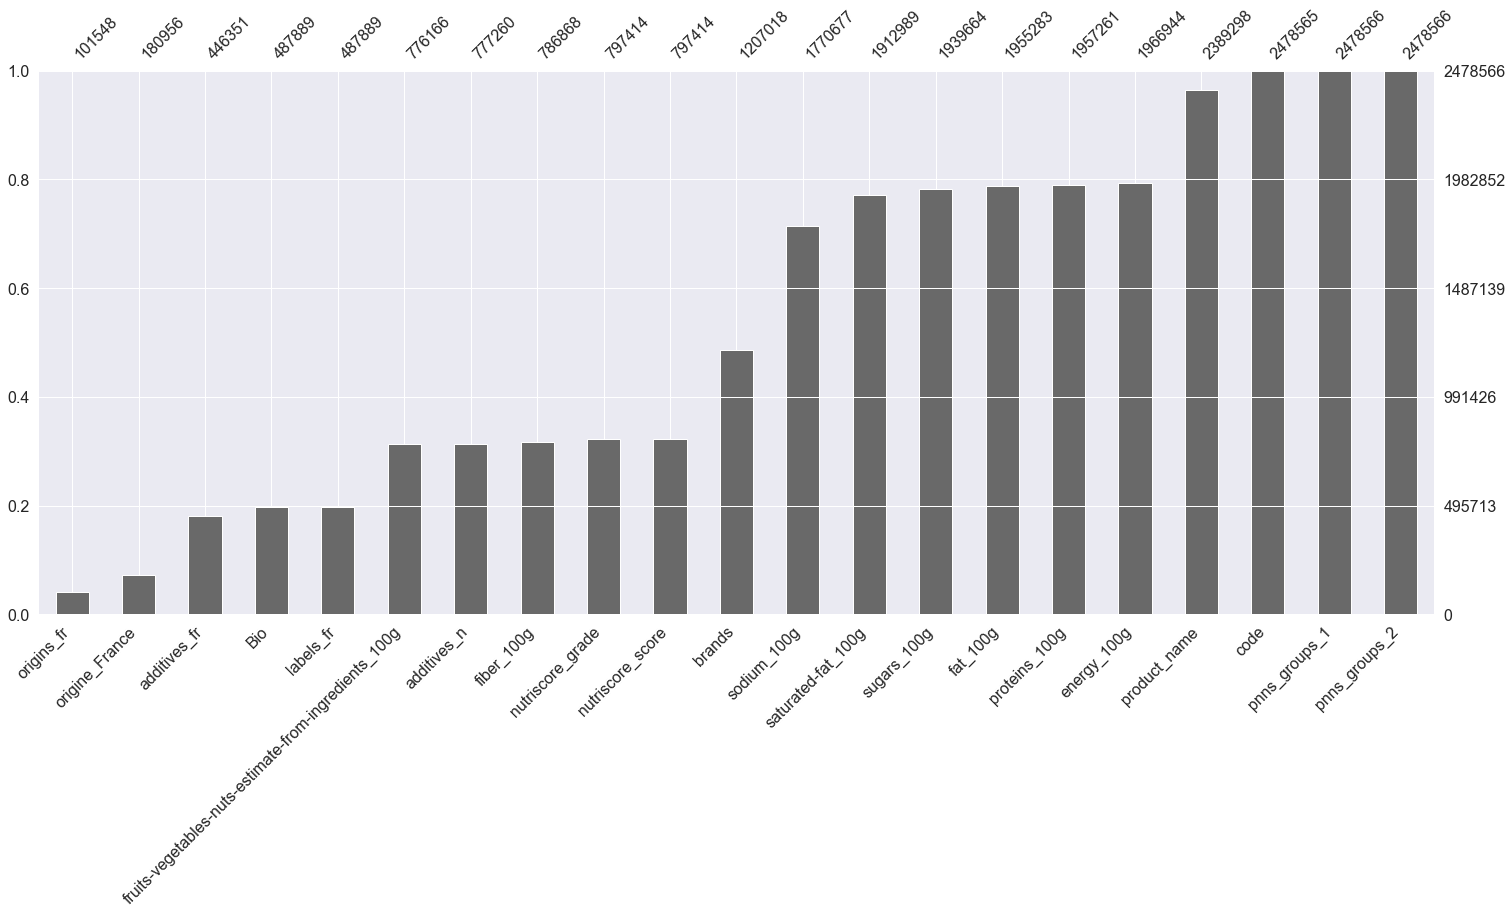

In [26]:
msno.bar(df,filter='bottom', sort='ascending')

<AxesSubplot:>

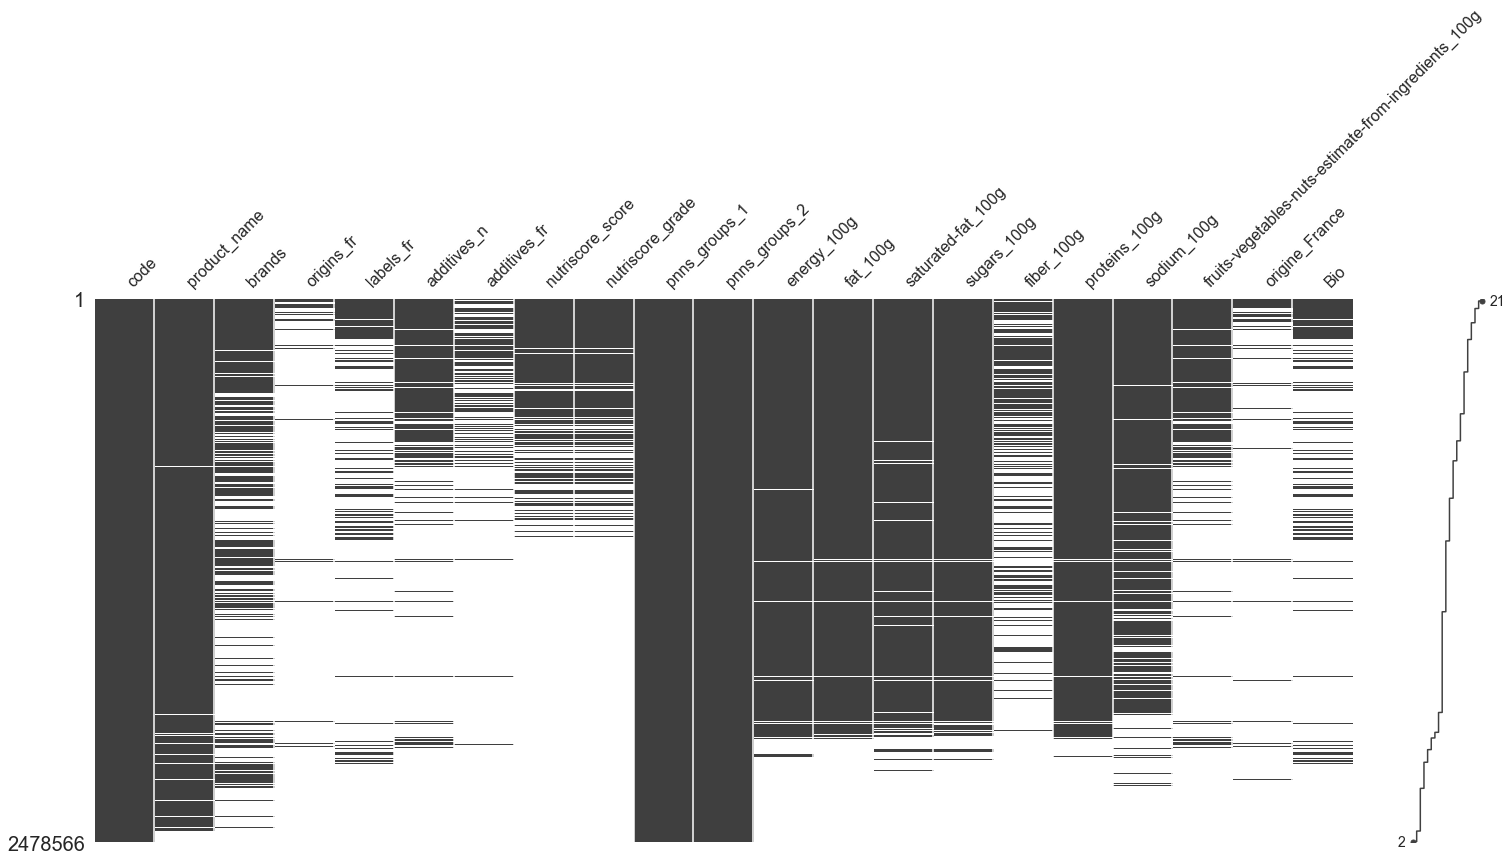

In [27]:
msno.matrix(df, filter='top', sort='descending')

In [28]:
# Retrait des valeurs manquantes

# Retrait des lignes qui ont plus de 75% de valeurs manquantes (15 valeurs manquantes)
threshold = 75
df = df.dropna(axis=0, thresh = int((1-(threshold/100))*df.shape[1]))

<AxesSubplot:>

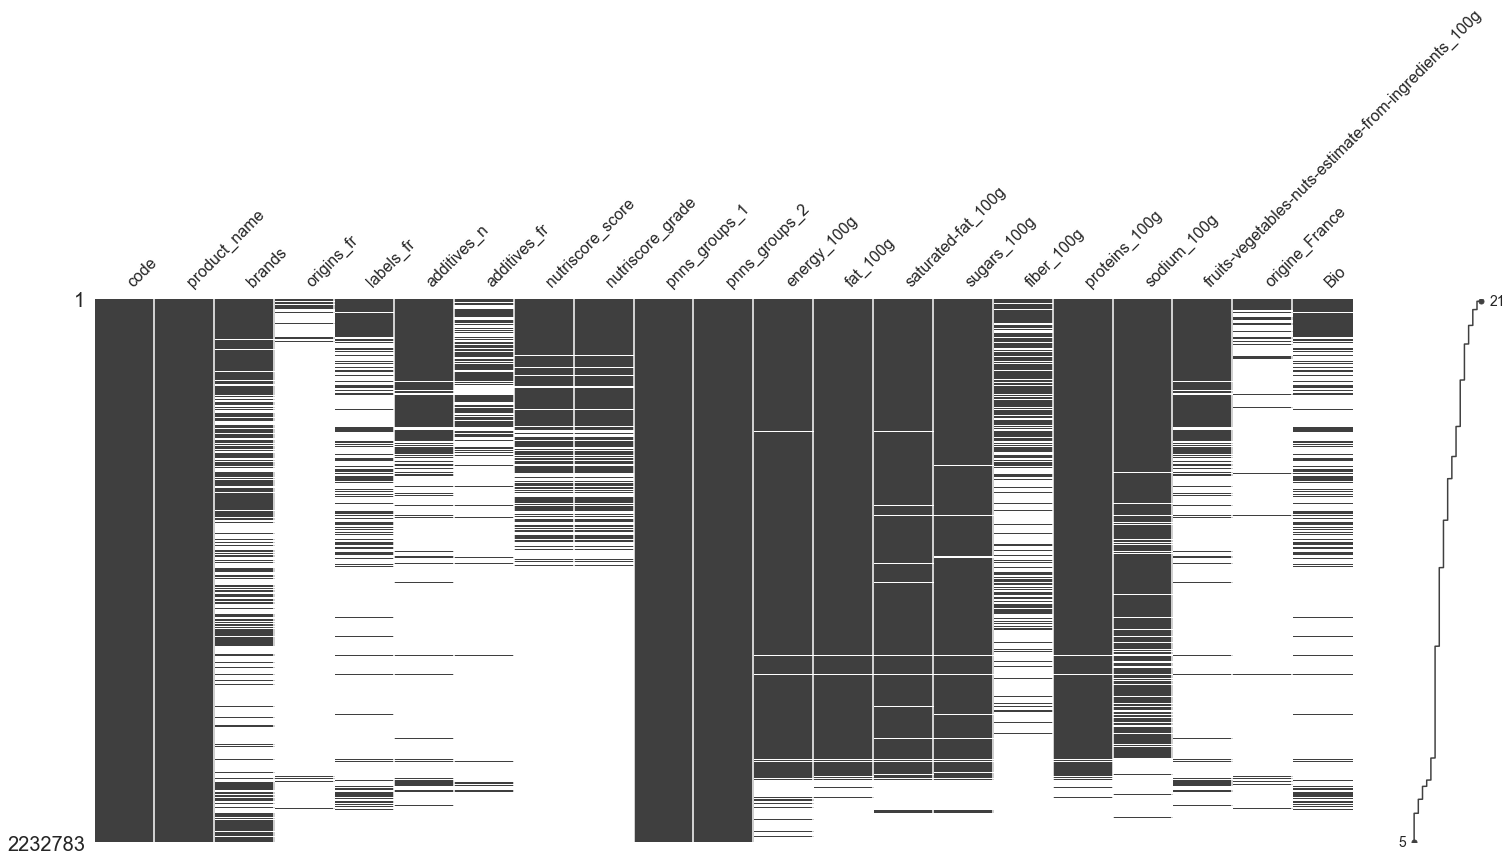

In [29]:
msno.matrix(df, filter='top', sort='descending')

In [30]:
print(2478566 - 2232783)

245783


# IV) Prédiction des valeurs manquantes par des valeurs connus

### Imputation des valeurs des produits de la catégorie "Eau"

In [31]:
lst_Columns_fit = ['energy_100g',
                   'fat_100g',
                   'saturated-fat_100g',
                   'sugars_100g',
                   'fiber_100g',
                   'proteins_100g',
                   'sodium_100g',
                   'fruits-vegetables-nuts-estimate-from-ingredients_100g']

df.loc[df['pnns_groups_2'].str.contains("Waters", case=False, na=np.nan) == True, lst_Columns_fit] = df[lst_Columns_fit].fillna(0)

### Création d'un échantillon du jeu de données

In [32]:
# Création d'un jeu de données sans les NaN pour fit les données. 
# Ce subset contiendra les colonnes suivantes 

lst_Columns_fit = ['nutriscore_score',
                   'energy_100g',
                   'fat_100g',
                   'saturated-fat_100g',
                   'sugars_100g',
                   'fiber_100g',
                   'proteins_100g',
                   'sodium_100g',
                   'fruits-vegetables-nuts-estimate-from-ingredients_100g']

df_to_fit = df[lst_Columns_fit].dropna()
df_to_fit.shape



(397611, 9)

In [33]:
df_to_fit=df_to_fit.sample(30_000)

# V) Prédiction des valeurs manquantes par Machine Learning

## <a name="C7"> Préparation du jeu de donnée</a>

### Etape de transformation des données

In [34]:
# Transformation des variables numériques en Log naturel (+1)

lst_Columns_fit = ['fat_100g',
                   'saturated-fat_100g',
                   'sugars_100g',
                   'fiber_100g',
                   'proteins_100g',
                   'sodium_100g',
                   'fruits-vegetables-nuts-estimate-from-ingredients_100g']

for columns in lst_Columns_fit:
    df_to_fit[columns] = np.log(df_to_fit[columns]+1)

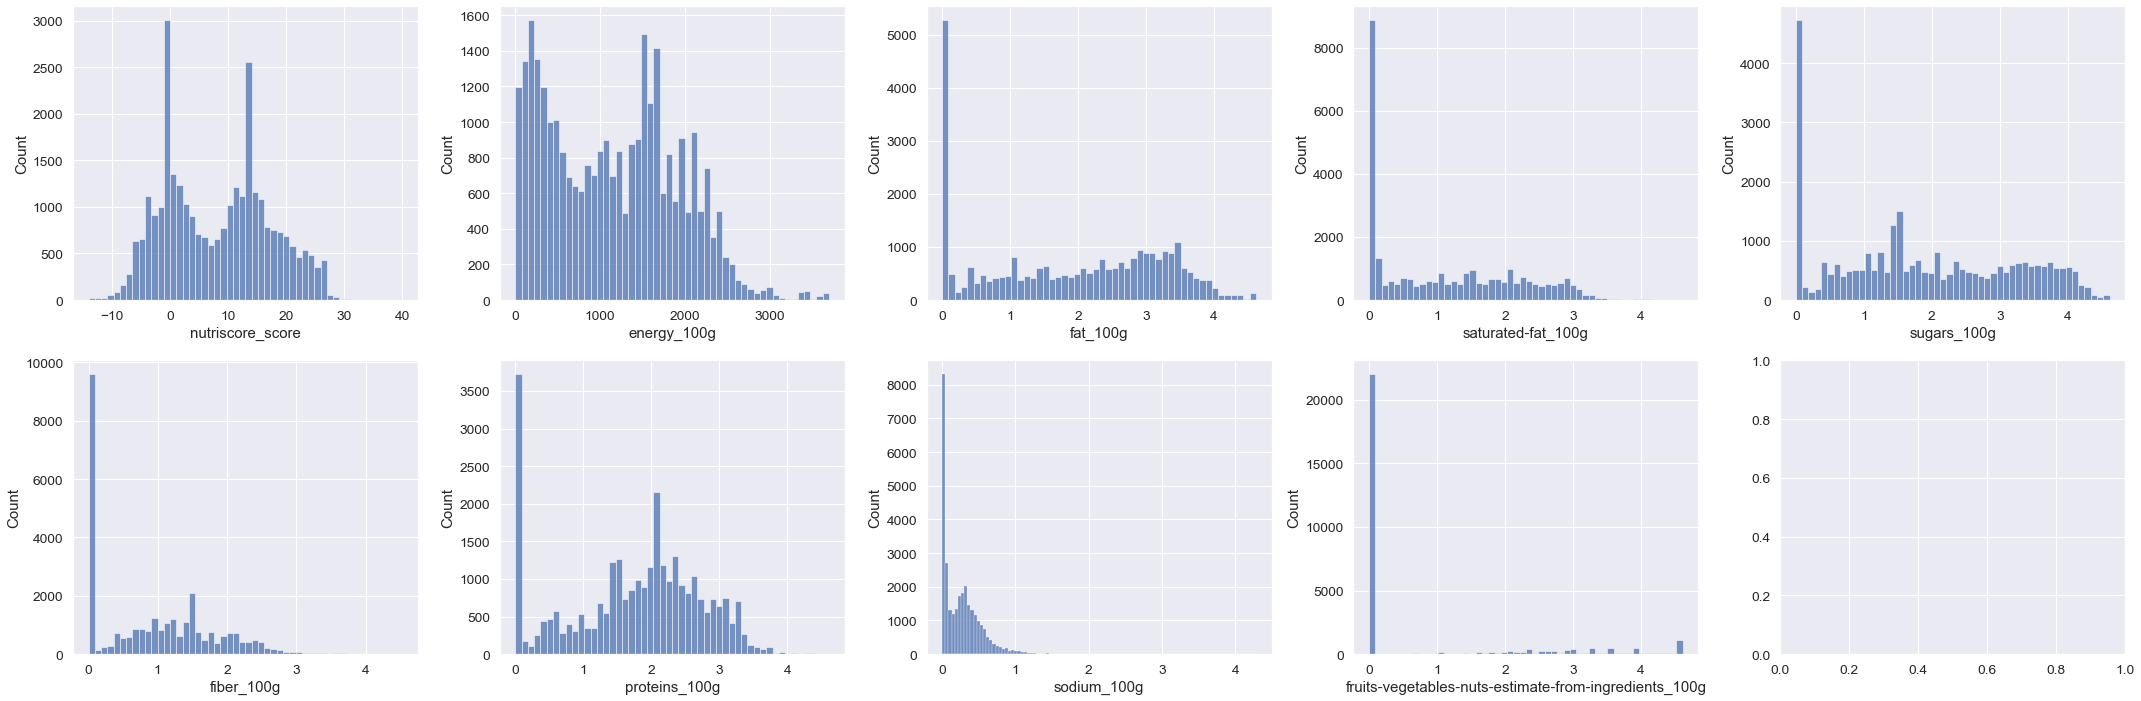

In [35]:
# Histogramme des données transformées

fig, axes = plt.subplots(ncols=5,nrows=2,figsize=(30,10))

sns.set(font_scale=1.25)
sns.histplot(ax=axes[0,0],data=df_to_fit, x="nutriscore_score",bins=50)
sns.histplot(ax=axes[0,1],data=df_to_fit, x="energy_100g",bins=50)
sns.histplot(ax=axes[0,2],data=df_to_fit, x="fat_100g",bins=50)
sns.histplot(ax=axes[0,3],data=df_to_fit, x="saturated-fat_100g",bins=50)
sns.histplot(ax=axes[0,4],data=df_to_fit, x="sugars_100g",bins=50)
sns.histplot(ax=axes[1,0],data=df_to_fit, x="fiber_100g",bins=50)
sns.histplot(ax=axes[1,1],data=df_to_fit, x="proteins_100g",bins=50)
sns.histplot(ax=axes[1,2],data=df_to_fit, x="sodium_100g",bins=100)
sns.histplot(ax=axes[1,3],data=df_to_fit, x="fruits-vegetables-nuts-estimate-from-ingredients_100g",bins=50)


fig.tight_layout()

plt.show()

Les distributions sont de ressembler à une Loi Normal. Nous utiliserons le MinMaxScaler pour normaliser les données. 

### Etape de normalisation des données

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_to_fit = pd.DataFrame(scaler.fit_transform(df_to_fit),index=df_to_fit.index, columns = df_to_fit.columns)

df_to_fit['pnns_groups_2']= df['pnns_groups_2']



## <a name="C8"> Selection du meilleur modèle </a>

Dans cette partie, nous allons déterminer le modèle le plus performant afin de prédire les données manquantes relatives au Nutriscore.
Pour cela, nous allons comparer : 
&nbsp;

- 3 formats de données en entrée : 
    - Données Transformées (log naturel +1), Normalisées (MinMax scaler)
    - Données Transformées (log naturel +1), Normalisées (MinMax scaler) + pnns_groups_2 encodées
    - Données Normalisées (MinMax scaler)
    
&nbsp;

- 5 méthodes : 
    - Régression linéaire 
    - KNN 
    - Random Forest
    - Moyenne
    - Médiane

&nbsp;
- 3 Critères de décision : 
    - Erreur moyenne absolue (Moyenne (Valeurs prédites – Valeurs du test set))
    - Score du modèle (Coefficient de détermination R2)
    - Facilité à imputer les données par la suite. 


In [37]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


#### Données transformées + normalisées

In [38]:
# Préparation d'un dictionnaire des paramètres pour grid_search CV
param_grid ={
    'linear_regression':{
        'model' : LinearRegression(),
        'params' : {
                    }
    },
    'KNN' : {
        'model' : KNeighborsRegressor(),
        'params' : {
            'n_neighbors': np.arange(3,5)     
            }
    },
    'random_forest' : {
    'model' : RandomForestRegressor(),
    'params' : {
        'n_estimators': np.arange(4,10)
         }
    },
 
}

scores=[]
mean_predict = []
median_predict = []


# Création d'une boucle va prendre chacune des Variables (constitutifs du nutriscore) pour la prédire (y)

for columns in df_to_fit.drop(columns=['pnns_groups_2']):
    X = df_to_fit.drop(columns=[columns,'pnns_groups_2'])
    y = df_to_fit[columns]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)
    
    # Création d'une boucle qui va tester les différents modèles et enregistrer les scores des modèles, les meilleurs paramètres et l'erreur moyenne absolue
    for model_name,mp in param_grid.items():
        model_compare = GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=False)
        model_compare.fit(X_train,y_train)
        scores.append({
            'Y_variable':columns,
            'model' : model_name,
            'top_params' : model_compare.best_params_,
            'top_score' : model_compare.best_score_,
            'MAE' : round(np.mean(abs(model_compare.predict(X_test) - y_test)), 2)
        })
    mean_y = np.mean(y_train)
    median_y = np.median(y_train)
    mean_predict.append({
        'Y_variable':columns,
        'modele': 'Mean',
        'MAE': round(np.mean( abs(y_test.apply(lambda v: mean_y) - y_test)), 2)
    })
    median_predict.append({
        'Y_variable':columns,
        'modele': 'Median',
        'MAE': round(np.mean( abs(y_test.apply(lambda v: median_y) - y_test)), 2)
    })


# Print des résultats
    
print(*scores, sep='\n')
print(*mean_predict, sep='\n')
print(*median_predict, sep='\n')





{'Y_variable': 'nutriscore_score', 'model': 'linear_regression', 'top_params': {}, 'top_score': 0.8202498185989305, 'MAE': 0.05}
{'Y_variable': 'nutriscore_score', 'model': 'KNN', 'top_params': {'n_neighbors': 4}, 'top_score': 0.903157878319876, 'MAE': 0.03}
{'Y_variable': 'nutriscore_score', 'model': 'random_forest', 'top_params': {'n_estimators': 9}, 'top_score': 0.943181131158697, 'MAE': 0.02}
{'Y_variable': 'energy_100g', 'model': 'linear_regression', 'top_params': {}, 'top_score': 0.7204331820910288, 'MAE': 0.08}
{'Y_variable': 'energy_100g', 'model': 'KNN', 'top_params': {'n_neighbors': 4}, 'top_score': 0.9070082123711368, 'MAE': 0.03}
{'Y_variable': 'energy_100g', 'model': 'random_forest', 'top_params': {'n_estimators': 7}, 'top_score': 0.9216994243578935, 'MAE': 0.03}
{'Y_variable': 'fat_100g', 'model': 'linear_regression', 'top_params': {}, 'top_score': 0.8454064382772107, 'MAE': 0.08}
{'Y_variable': 'fat_100g', 'model': 'KNN', 'top_params': {'n_neighbors': 4}, 'top_score': 0.

#### Données transformées + normalisées + groupe de produits encodé

In [39]:
# Préparation d'un dictionnaire des paramètres pour grid_search CV

param_grid ={
    'linear_regression':{
        'model' : LinearRegression(),
        'params' : {
                    }
    },
    'KNN' : {
        'model' : KNeighborsRegressor(),
        'params' : {
            'n_neighbors': np.arange(3,5)     
            }
    },
    'random_forest' : {
    'model' : RandomForestRegressor(),
    'params' : {
        'n_estimators': np.arange(4,10)
         }
    },
 
}

scores=[]
mean_predict = []
median_predict = []

# Création d'une boucle va prendre chacune des Variables (constitutifs du nutriscore) pour la prédire (y)

for columns in df_to_fit.drop(columns=['pnns_groups_2']):
    X = pd.get_dummies(df_to_fit, columns=['pnns_groups_2']).drop(columns=columns) # Encodage du groupe de produit 

    y = df_to_fit[columns]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)
    
        # Création d'une boucle qui va tester les différents modèles et enregistrer les scores des modèles, les meilleurs paramètres et l'erreur moyenne absolue

    for model_name,mp in param_grid.items():
        model_compare = GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=False)
        model_compare.fit(X_train,y_train)
        scores.append({
            'Y_variable':columns,
            'model' : model_name,
            'top_params' : model_compare.best_params_,
            'top_score' : model_compare.best_score_,
            'MAE' : round(np.mean(abs(model_compare.predict(X_test) - y_test)), 2)
        })
    mean_y = np.mean(y_train)
    median_y = np.median(y_train)
    mean_predict.append({
        'Y_variable':columns,
        'modele': 'Mean',
        'MAE': round(np.mean( abs(y_test.apply(lambda v: mean_y) - y_test)), 2)
    })
    median_predict.append({
        'Y_variable':columns,
        'modele': 'Median',
        'MAE': round(np.mean( abs(y_test.apply(lambda v: median_y) - y_test)), 2)
    })
    
print(*scores, sep='\n')
print(*mean_predict, sep='\n')
print(*median_predict, sep='\n')




{'Y_variable': 'nutriscore_score', 'model': 'linear_regression', 'top_params': {}, 'top_score': -7.810974381194268e+19, 'MAE': 0.04}
{'Y_variable': 'nutriscore_score', 'model': 'KNN', 'top_params': {'n_neighbors': 4}, 'top_score': 0.9129121885758754, 'MAE': 0.03}
{'Y_variable': 'nutriscore_score', 'model': 'random_forest', 'top_params': {'n_estimators': 9}, 'top_score': 0.968561646297791, 'MAE': 0.02}
{'Y_variable': 'energy_100g', 'model': 'linear_regression', 'top_params': {}, 'top_score': -3.262476503940972e+19, 'MAE': 0.06}
{'Y_variable': 'energy_100g', 'model': 'KNN', 'top_params': {'n_neighbors': 4}, 'top_score': 0.9121507900798168, 'MAE': 0.03}
{'Y_variable': 'energy_100g', 'model': 'random_forest', 'top_params': {'n_estimators': 8}, 'top_score': 0.9310143649415936, 'MAE': 0.03}
{'Y_variable': 'fat_100g', 'model': 'linear_regression', 'top_params': {}, 'top_score': -1.1201056826790863e+22, 'MAE': 0.07}
{'Y_variable': 'fat_100g', 'model': 'KNN', 'top_params': {'n_neighbors': 4}, '

#### Données normalisées

In [40]:
# Création d'un dataframe où les données sont Normalisées
lst_Columns_fit = ['nutriscore_score',
                   'energy_100g',
                   'fat_100g',
                   'saturated-fat_100g',
                   'sugars_100g',
                   'fiber_100g',
                   'proteins_100g',
                   'sodium_100g',
                   'fruits-vegetables-nuts-estimate-from-ingredients_100g']

df_to_fit = df[lst_Columns_fit].dropna()

df_to_fit=df_to_fit.sample(30_000)

df_to_fit = pd.DataFrame(scaler.fit_transform(df_to_fit),index=df_to_fit.index, columns = df_to_fit.columns)

# Préparation d'un dictionnaire des paramètres pour grid_search CV

param_grid ={
    'linear_regression':{
        'model' : LinearRegression(),
        'params' : {
                    }
    },
    'KNN' : {
        'model' : KNeighborsRegressor(),
        'params' : {
            'n_neighbors': np.arange(3,5)     
            }
    },
    'random_forest' : {
    'model' : RandomForestRegressor(),
    'params' : {
        'n_estimators': np.arange(4,10)
         }
    },
 
}

scores=[]
mean_predict = []
median_predict = []

# Création d'une boucle va prendre chacune des Variables (constitutifs du nutriscore) pour la prédire (y)

for columns in df_to_fit:
    X = df_to_fit.drop(columns=columns)
    y = df_to_fit[columns]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)
    
    # Création d'une boucle qui va tester les différents modèles et enregistrer les scores des modèles, les meilleurs paramètres et l'erreur moyenne absolue

    for model_name,mp in param_grid.items():
        model_compare = GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=False)
        model_compare.fit(X_train,y_train)
        scores.append({
            'Y_variable':columns,
            'model' : model_name,
            'top_params' : model_compare.best_params_,
            'top_score' : model_compare.best_score_,
            'MAE' : round(np.mean(abs(model_compare.predict(X_test) - y_test)), 2)
        })
    mean_y = np.mean(y_train)
    median_y = np.median(y_train)
    mean_predict.append({
        'Y_variable':columns,
        'modele': 'Mean',
        'MAE': round(np.mean( abs(y_test.apply(lambda v: mean_y) - y_test)), 2)
    })
    median_predict.append({
        'Y_variable':columns,
        'modele': 'Median',
        'MAE': round(np.mean( abs(y_test.apply(lambda v: median_y) - y_test)), 2)
    })
    
print(*scores, sep='\n')
print(*mean_predict, sep='\n')
print(*median_predict, sep='\n')

{'Y_variable': 'nutriscore_score', 'model': 'linear_regression', 'top_params': {}, 'top_score': 0.668043111669932, 'MAE': 0.08}
{'Y_variable': 'nutriscore_score', 'model': 'KNN', 'top_params': {'n_neighbors': 4}, 'top_score': 0.8571382953351497, 'MAE': 0.04}
{'Y_variable': 'nutriscore_score', 'model': 'random_forest', 'top_params': {'n_estimators': 9}, 'top_score': 0.9419206129494185, 'MAE': 0.02}
{'Y_variable': 'energy_100g', 'model': 'linear_regression', 'top_params': {}, 'top_score': 0.7704601330630041, 'MAE': 0.07}
{'Y_variable': 'energy_100g', 'model': 'KNN', 'top_params': {'n_neighbors': 4}, 'top_score': 0.9074391762327152, 'MAE': 0.03}
{'Y_variable': 'energy_100g', 'model': 'random_forest', 'top_params': {'n_estimators': 9}, 'top_score': 0.9257378449818554, 'MAE': 0.03}
{'Y_variable': 'fat_100g', 'model': 'linear_regression', 'top_params': {}, 'top_score': 0.7860929444809711, 'MAE': 0.05}
{'Y_variable': 'fat_100g', 'model': 'KNN', 'top_params': {'n_neighbors': 4}, 'top_score': 0

In [41]:
# Afin de prédire les valeurs manquantes, les modèles de random Forest sont les plus performants. L'ajout du groupe de produits améliore les performance des modèles d'environs deux points mais complexifie les étapes de transformation et les analyses par la suite.
# Nous prédirons les valeurs manquantes par l'algo de Random forest par la suite. 
# Le jeu de donnée étant conséquent, il est important d'utiliser la learning curve afin de determiner combien de données sont nécessaires à l'entrainement du modèle

## <a name="C9"> Optimisation et entraînement du modèle </a>

In [42]:
# Par soucis de performance, il est nécessaire de déterminer la taille du jeu de donnée suffisant afin d'avoir des prédictions corrects.  

In [43]:
from sklearn.model_selection import learning_curve


lst_Columns_fit = ['nutriscore_score',
                   'energy_100g',
                   'fat_100g',
                   'saturated-fat_100g',
                   'sugars_100g',
                   'fiber_100g',
                   'proteins_100g',
                   'sodium_100g',
                   'fruits-vegetables-nuts-estimate-from-ingredients_100g']

df_to_fit = df[lst_Columns_fit].dropna()

    
df_to_fit = pd.DataFrame(scaler.fit_transform(df_to_fit),index=df_to_fit.index, columns = df_to_fit.columns)

X = df_to_fit.drop(columns=['nutriscore_score'])
y = df_to_fit['nutriscore_score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)


model = RandomForestRegressor(n_estimators= 9, random_state=42)



In [44]:
# La courbe d'apprentissage (learning curve) permet de tester la précision du modèle sur des échantillons du dataframe de plus en plus grand. 
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.001,1,10), cv=5)

print(N)


[   254  28500  56746  84992 113239 141485 169731 197977 226223 254470]


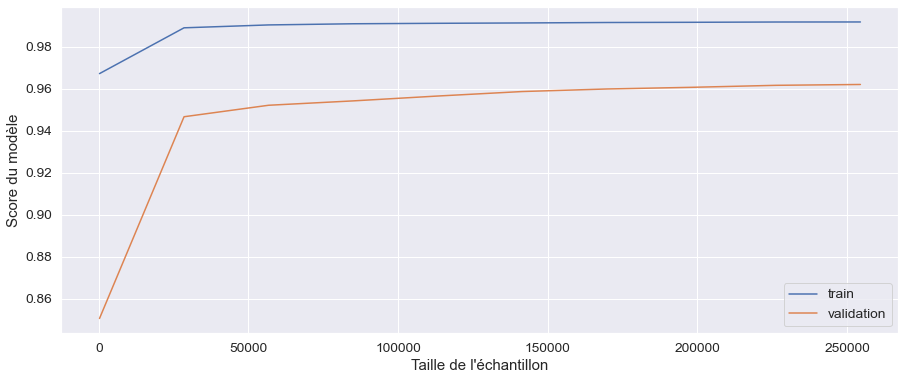

In [45]:

plt.figure(figsize=(15,6))
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label= 'validation')
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Score du modèle")
plt.legend()

In [46]:
#Chargement des librairies
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Chargement de l'imputer avec le modèle Random Forest
imputer = IterativeImputer(RandomForestRegressor(n_estimators=9),max_iter=15, random_state=42, verbose=2)

#entraînement de l'imputer avec les données (échantillon de 100 000)

df_to_fit=df_to_fit.sample(100_000)
imputer.fit(df_to_fit)


[IterativeImputer] Completing matrix with shape (100000, 9)
[IterativeImputer] Ending imputation round 1/15, elapsed time 36.16
[IterativeImputer] Change: 0.0, scaled tolerance: 0.001 
[IterativeImputer] Early stopping criterion reached.


IterativeImputer(estimator=RandomForestRegressor(n_estimators=9), max_iter=15,
                 random_state=42, verbose=2)

In [47]:
import pickle

# Sauvegarde des paramètres de l'imputeur
#pickle.dump(imputer, open('B:\OpenClassRooms\Data_Scientist\Projet_3\Imputer_fitted.pkl', 'wb'))


## <a name="C10"> Prédiction des valeurs manquantes du jeu de données </a>

In [48]:

lst_Columns_fit = ['nutriscore_score',
                   'energy_100g',
                   'fat_100g',
                   'saturated-fat_100g',
                   'sugars_100g',
                   'fiber_100g',
                   'proteins_100g',
                   'sodium_100g',
                   'fruits-vegetables-nuts-estimate-from-ingredients_100g']

df_to_impute = df[lst_Columns_fit]

#Création d'un jeu de donnée qui prend les données d'origines puis remplace les nan par leur valeur prédite. 
df_to_impute = pd.DataFrame(scaler.transform(df_to_impute),index=df_to_impute.index, columns = df_to_impute.columns)

df_to_impute = pd.DataFrame(imputer.transform(df_to_impute),columns = df_to_impute.columns,index=df_to_impute.index)

df_to_impute = pd.DataFrame(scaler.inverse_transform(df_to_impute),columns = df_to_impute.columns,index=df_to_impute.index)

[IterativeImputer] Completing matrix with shape (2232783, 9)
[IterativeImputer] Ending imputation round 1/1, elapsed time 9.06


In [49]:

# Insertion des valeurs prédites dans le jeu de données de base
df_final=pd.concat([df_to_impute,df.drop(columns = lst_Columns_fit)],axis = 1)


## <a name="C11"> Prédiction du Grade Nutriscore </a>

In [50]:
def nutriscore_score_to_grade(x, solid=True):
    if solid is True:
        if x < 0 :
            return 'A'
        elif x < 3 : 
            return 'B'
        elif x < 11 : 
            return  'C'
        elif x < 19 : 
            return  'D'
        else:
            return  'E'
    else:
        if x < 0 :
            return 'A'
        elif x < 2 : 
            return 'B'
        elif x < 6 : 
            return 'C'
        elif x < 9 : 
            return 'D'
        else:
            return 'E'
        

In [51]:
# Test de la fonction nutriscore_score_to_grade sur données fixes
print(nutriscore_score_to_grade(9,solid=True))
print(nutriscore_score_to_grade(9,solid=False))

C
E


In [52]:
# Test de la fonction nutriscore_score_to_grade sur les données via apply

df_final['nutriscore_score'].apply(nutriscore_score_to_grade,solid=False).head()

0    D
1    C
2    B
3    A
4    E
Name: nutriscore_score, dtype: object

In [53]:
df_final['nutriscore_grade2']=np.where(df_final['pnns_groups_1'].str.contains("Beverage", case=False, na=np.nan) == True, 
                                       df_final['nutriscore_score'].apply(nutriscore_score_to_grade,solid=False),
                                       df_final['nutriscore_score'].apply(nutriscore_score_to_grade,solid=True))

In [54]:
comparaisonNutri = df_final[['nutriscore_grade2','nutriscore_grade','pnns_groups_1','pnns_groups_2']].dropna()


In [55]:
print(f'Nombre de produits où les nutriscore grade sont renseignés : {len(comparaisonNutri)}')
print(f"Nombre de produits où les nutriscore grade renseignés sont similaires au valeurs prédites: {sum(comparaisonNutri['nutriscore_grade2'].str.lower() == comparaisonNutri['nutriscore_grade'])} ")

Nombre de produits où les nutriscore grade sont renseignés : 797414
Nombre de produits où les nutriscore grade renseignés sont similaires au valeurs prédites: 747834 


In [56]:
#Création d'une colonne qui détermine si les grades Nutris-score d'origine sont similaires aux Nutri-score prédits
comparaisonNutri['Nutri_similar']=(comparaisonNutri['nutriscore_grade2'].str.lower() == comparaisonNutri['nutriscore_grade'])

In [57]:
per_error = round(((len(comparaisonNutri) - sum(comparaisonNutri['Nutri_similar']))/len(comparaisonNutri))*100,2)

print(f"Le pourcentage d'erreur sur la prédiction du grade de nutriscore est de {per_error} %")

Le pourcentage d'erreur sur la prédiction du grade de nutriscore est de 6.22 %


In [58]:
# Nombre de produits dans chaque groupe ayant un Grade Nutri-Score

comparaisonNutri[['pnns_groups_1','Nutri_similar']].groupby('pnns_groups_1').count()

,Nutri_similar
pnns_groups_1,
Alcoholic beverages,74
Beverages,49837
Cereals and potatoes,83808
Composite foods,55687
Fat and sauces,58166
Fish Meat Eggs,96630
Fruits and vegetables,48368
Milk and dairy products,93433
Salty snacks,34185


In [59]:
# Nombre de produits dans chaque groupe ayant la même valeur de nutriscore grade entre les valeurs réelles et les valeurs prédites

comparaisonNutri[['pnns_groups_1','Nutri_similar']].groupby('pnns_groups_1').sum()

,Nutri_similar
pnns_groups_1,
Alcoholic beverages,63
Beverages,39633
Cereals and potatoes,81244
Composite foods,52818
Fat and sauces,54160
Fish Meat Eggs,90619
Fruits and vegetables,47748
Milk and dairy products,89516
Salty snacks,32232


In [60]:
# Nombre de produits dans chaque groupe ayant une mauvaise prédiction

comparaisonNutri[['pnns_groups_1','Nutri_similar']].groupby('pnns_groups_1').count() - comparaisonNutri[['pnns_groups_1','Nutri_similar']].groupby('pnns_groups_1').sum()

,Nutri_similar
pnns_groups_1,
Alcoholic beverages,11
Beverages,10204
Cereals and potatoes,2564
Composite foods,2869
Fat and sauces,4006
Fish Meat Eggs,6011
Fruits and vegetables,620
Milk and dairy products,3917
Salty snacks,1953


<AxesSubplot:xlabel='Groupe pnns 1', ylabel="Pourcentage d'erreur">

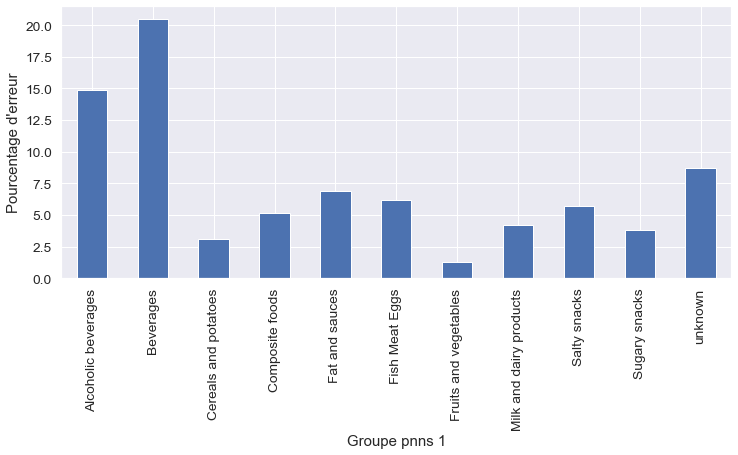

In [61]:
round(((comparaisonNutri[['pnns_groups_1','Nutri_similar']].groupby('pnns_groups_1').count()-
        comparaisonNutri[['pnns_groups_1','Nutri_similar']].groupby('pnns_groups_1').sum())/
       comparaisonNutri[['pnns_groups_1','Nutri_similar']].groupby('pnns_groups_1').count())*100,
      2).plot(kind="bar",legend=False,xlabel="Groupe pnns 1", ylabel="Pourcentage d'erreur",figsize=(12,5))


In [62]:
# Précision des prédictions par groupe de produits

(comparaisonNutri[['pnns_groups_1','Nutri_similar']].groupby('pnns_groups_1').sum()/comparaisonNutri[['pnns_groups_1','Nutri_similar']].groupby('pnns_groups_1').count())*100

,Nutri_similar
pnns_groups_1,
Alcoholic beverages,85.135135
Beverages,79.525252
Cereals and potatoes,96.940626
Composite foods,94.847990
Fat and sauces,93.112815
Fish Meat Eggs,93.779365
Fruits and vegetables,98.718161
Milk and dairy products,95.807691
Salty snacks,94.286968


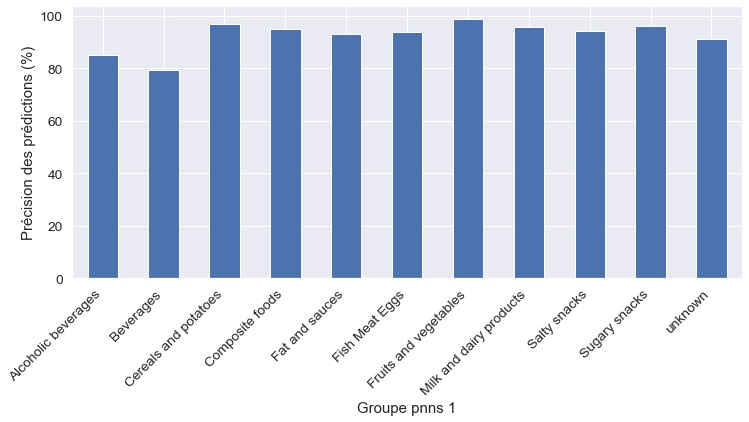

In [63]:
round((comparaisonNutri[['pnns_groups_1','Nutri_similar']].groupby('pnns_groups_1').sum()/
       comparaisonNutri[['pnns_groups_1','Nutri_similar']].groupby('pnns_groups_1').count())*100,2).plot(kind="bar",
                                                                                                         legend=False,
                                                                                                         xlabel="Groupe pnns 1", 
                                                                                                         ylabel="Précision des prédictions (%)", rot=45,
                                                                                                         figsize=(12,5))
plt.xticks(ha='right')
plt.show()

In [64]:
# Sauvegarde du jeu de données final
#df_final.to_csv(r'B:\OpenClassRooms\Data_Scientist\Projet_3\fr.openfoodfacts.org.products_clean.csv',sep='\t')